In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# %matplotlib inline ### most nem kell, de maskor jol johet :-)

**Adatok betöltése**

In [3]:
data = pd.read_csv('http://www.biointelligence.hu/mi/fuel_data_with_errors.txt', header=0, sep='\t')

In [4]:
data

,date,starttime,endtime,starttemp,endtemp,air conditioner,trafic,route,dist,avg.cons.,speed,duration,fuel type,road,num. persons
0,2018.06.03,00:03,01:16,17.0,15.0,off,low,bp-dujv,69.8,4.5,57,01:13,95+,standard,1
1,2018.06.03,08:20,09:29,19.0,24.0,off,low,dujv-bp,68.6,4.6,59,01:09,95+,standard,2
2,2018.06.03,13:00,15:00,30.0,28.0,on,normal,bp-dujv,79.5,6.0,47,01:40,95+,standard,3
3,2018.06.04,15:30,16:30,29.0,28.0,on,normal,dujv-szelid,45.2,4.3,56,00:48,95+,standard,1
4,2018.06.04,18:18,19:10,30.0,25.0,on,normal,szelid-dujv,47.5,4.7,57,00:49,95+,standard,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2018.09.03,22:00,22:55,21.0,19.0,off,normal,bp-dujv,68.2,5.3,78,00:52,95+,highway,1
99,2018.09.04,06:42,07:55,16.0,17.0,off,normal,dujv-bp,69.1,4.5,58,01:10,95+,highway,1
100,2018.09.04,20:00,21:10,17.0,16.0,off,low,bp-dujv,71.6,4.5,65,01:05,95+,highway,1
101,2018.09.05,08:15,09:25,15.0,20.0,off,normal,dujv-bp,71.7,4.7,62,01:09,95+,highway,1


**DataFrame oszlopai**

In [5]:
data['starttemp']  # egy oszlopra jol olvashatoan hivatkozhatunk az oszlop nevevel

0      17.0
1      19.0
2      30.0
3      29.0
4      30.0
       ... 
98     21.0
99     16.0
100    17.0
101    15.0
102    21.0
Name: starttemp, Length: 103, dtype: float64

In [ ]:
list(data) # oszlopnevek listaja

**Hiányzó értékek (missing values)**

In [6]:
data['starttemp'].isnull()
# egy DataFrame típusú True-False vektort ad.
# Az ertek attol fuggoen True vagy False, hogy
# az adott peldany eeseteben a cella erteke null-e
# (azaz hianyzo ertek-e)

0      False
1      False
2      False
3      False
4      False
       ...  
98     False
99     False
100    False
101    False
102    False
Name: starttemp, Length: 103, dtype: bool

In [10]:
data['starttemp'].isnull().sum()
# összeadasnal: True=1, False=1
# Igy tehat a hianyzo ertekek szamat kapjuk

5

*1. feladat*

Írjon egy for ciklust, amely kiszámolja és kiírja a hiányzó értékek számát minden egyes attribútumra (oszlopra). A hiányzó értékek számával együtt az oszlop nevét is írja ki.

In [19]:
# ...IDE JÖN A KÓD...
for x in data:
  print(f"oszlop neve: {x:15}, hianyzo ertek szama: {data[x].isnull().sum()}")

oszlop neve: date           , hianyzo ertek szama: 0
oszlop neve: starttime      , hianyzo ertek szama: 0
oszlop neve: endtime        , hianyzo ertek szama: 0
oszlop neve: starttemp      , hianyzo ertek szama: 5
oszlop neve: endtemp        , hianyzo ertek szama: 4
oszlop neve: air conditioner, hianyzo ertek szama: 0
oszlop neve: trafic         , hianyzo ertek szama: 0
oszlop neve: route          , hianyzo ertek szama: 0
oszlop neve: dist           , hianyzo ertek szama: 1
oszlop neve: avg.cons.      , hianyzo ertek szama: 0
oszlop neve: speed          , hianyzo ertek szama: 0
oszlop neve: duration       , hianyzo ertek szama: 0
oszlop neve: fuel type      , hianyzo ertek szama: 0
oszlop neve: road           , hianyzo ertek szama: 0
oszlop neve: num. persons   , hianyzo ertek szama: 0


*2. feladat*

Készítsen másolatot az adatról, és a másolatban helyettesítse a *starttemp* oszlop hiányzó értékeit

(a) a starttemp átlagos értékével,

(b) a starttemp mediánjával.

(c) Írjon egy for ciklust, amely az összes oszlop esetén helyettesíti a hiányzó értékeket az adott oszlop átlagával, ahol ez lehetséges!

In [42]:
# ...IDE JÖN A KÓD...
data_copy = data.copy()
avg = data['starttemp'].mean()
starttemp_missing = data['starttemp'].isnull()
data_copy['starttemp'][starttemp_missing] = avg;
print(data_copy['starttemp']);

print(f"oszlop neve: {x:15}, hianyzo ertek szama: {data_copy['starttemp'].isnull().sum()}")


0      17.0
1      19.0
2      30.0
3      29.0
4      30.0
       ... 
98     21.0
99     16.0
100    17.0
101    15.0
102    21.0
Name: starttemp, Length: 103, dtype: float64
oszlop neve: num. persons   , hianyzo ertek szama: 0


In [44]:
# ...IDE JÖN A KÓD...
# ...IDE JÖN A KÓD...
data_copy = data.copy()
med = data['starttemp'].median()
starttemp_missing = data['starttemp'].isnull()
data_copy['starttemp'][starttemp_missing] = med;
print(data_copy['starttemp']);

print(f"oszlop neve: {x:15}, hianyzo ertek szama: {data_copy['starttemp'].isnull().sum()}")


0      17.0
1      19.0
2      30.0
3      29.0
4      30.0
       ... 
98     21.0
99     16.0
100    17.0
101    15.0
102    21.0
Name: starttemp, Length: 103, dtype: float64
oszlop neve: num. persons   , hianyzo ertek szama: 0


In [62]:
# ...IDE JÖN A KÓD...
data_copy = data.copy()
for x in data_copy:
  if(data_copy[x].isnull().sum() > 0):
    avg = data[x].median()
    starttemp_missing = data[x].isnull()
    data_copy[x][starttemp_missing] = med;

for x in data_copy:
  print(f"oszlop neve: {x:15}, hianyzo ertek szama: {data_copy[x].isnull().sum()}")


oszlop neve: date           , hianyzo ertek szama: 0
oszlop neve: starttime      , hianyzo ertek szama: 0
oszlop neve: endtime        , hianyzo ertek szama: 0
oszlop neve: starttemp      , hianyzo ertek szama: 5
oszlop neve: endtemp        , hianyzo ertek szama: 4
oszlop neve: air conditioner, hianyzo ertek szama: 0
oszlop neve: trafic         , hianyzo ertek szama: 0
oszlop neve: route          , hianyzo ertek szama: 0
oszlop neve: dist           , hianyzo ertek szama: 1
oszlop neve: avg.cons.      , hianyzo ertek szama: 0
oszlop neve: speed          , hianyzo ertek szama: 0
oszlop neve: duration       , hianyzo ertek szama: 0
oszlop neve: fuel type      , hianyzo ertek szama: 0
oszlop neve: road           , hianyzo ertek szama: 0
oszlop neve: num. persons   , hianyzo ertek szama: 0


A következőkben egy diagramon fogjuk ábrázolni az egyes utazások esetében az induláskori és érkezéskori hőmérsékletet. Csak azokat az utazásokat fogjuk használni, ahol az eredeti adatban mind a két hőmérsékleti érték adott. Először a scatterplottal ismerkedünk.

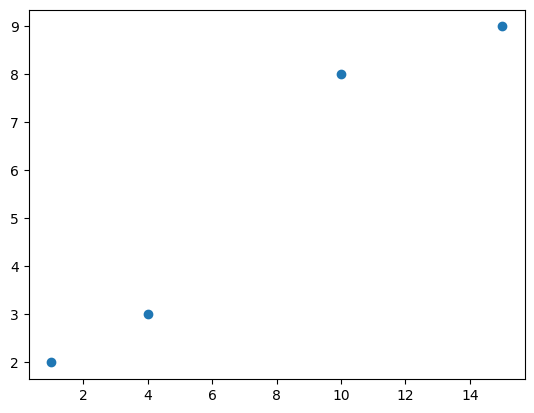

In [55]:
# 1 2
# 4 3
# 10 8
# 15 9
x = [1, 4, 10, 15]
y = [2, 3, 8, 9]
plt.scatter(x,y);

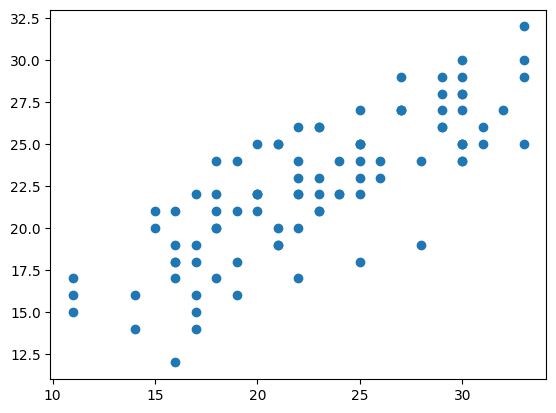

In [59]:
both_values_present = np.logical_and(data['starttemp'].isnull()==False,
                                     data['endtemp'].isnull()==False)
both_values_valid = np.logical_and(both_values_present, data['endtemp'] < 100)
plt.scatter( data[both_values_valid]['starttemp'],
            data[both_values_valid]['endtemp'] )
plt.show()

*3. feladat*

Az érkezéskori hőmérséklet jobb becslés lehet az indulási hőmérsékletre, mint az összes induláskori hőmérséklet átlaga, és fordítva: amikor az érkezéskori hőmérséklet hiányzik, az induláskori hőmérséklet lehet egy jó becslés.

(a) Írjon egy olyan kódot, amely ellenőrzi, hogy van-e olyan eset, amikor egyszerre hiányzik az induláskori és érkezéskori hőmérséklet!

(b) Amikor az **indulási** hőmérséklet hiányzik, helyettesítse azt az érkezéskori hőmérséklettel!

(c) Amikor csak az **érkezéskori** hőmérséklet hiányzik, helyettesítse azt az induláskori hőmérséklettel!


In [63]:
# ...IDE JÖN A KÓD..
both_values_missing = np.logical_and(data['starttemp'].isnull(), data['endtemp'].isnull())

In [71]:
# ...IDE JÖN A KÓD...
cpy = data.copy()
values_to_be_replaced = data['starttemp'].isnull()
cpy['starttemp'][values_to_be_replaced] = cpy['endtemp'][values_to_be_replaced]

print(cpy['starttemp'].isnull().sum())



0


*4. feladat*

Lehetséges, hogy az indulási és érkezéskori hőmérséklet különbsége összefügg azzal, hogy mikor kerül sor az utazásra (reggel nagyobb az érkezéskori hőmérséklet, este pedig kisebb). A következőkben ezt fogjuk megvizsgálni.

(a) Vezessen be egy új oszlopot, ami a két hőmérséklet különbségét tartalmazza.

In [72]:
# ...IDE JÖN A KÓD...
data['temp_diff'] = data['endtemp'] - data['starttemp']

(b) Vezessen be egy új oszlopot, ami azt tartalmazza számként, hogy a nap melyik órájában kerül sor az utazásra! Ezt az információt a *starttime* oszlopban található string első két karakteréből "hámozza ki".

In [81]:
# ...IDE JÖN A KÓD...
data['hour'] = 0
for i in range(len(data)):
  data['hour'][i] = int(data['starttime'][i][0:2])

A következőkben csoportosítjuk az egyes utazásokat aszerint, hogy a nap melyik órájában kerül sor az utazásra, majd csoportonként kiszámoljuk az előbbiekben bevezetett *temp_diff* mediánját, amelyet az óra függvényében ábrázolunk.

<Axes: xlabel='hour'>

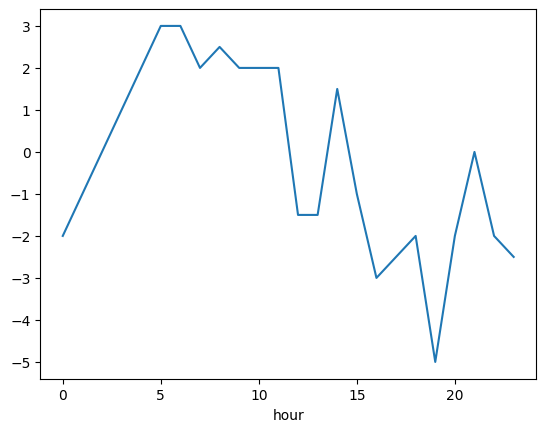

In [84]:
# ...IDE JÖN A KÓD...
data.groupby('hour')['temp_diff'].median().plot()

*5. feladat*

(a) Helyettesítse a **starttemp** hiányzó értékeit az **endtemp** hozzátartozó értékével úgy, hogy közben korrigál a két hőmérséklet közötti "szokásos" különbséggel (az előbb kiszámolt mediánnal)!

In [ ]:
# ...IDE JÖN A KÓD...

(b) Helyettesítse az **endtemp** hiányzó értékeit a **starttemp** hozzátartozó értékével úgy, hogy közben korrigál a két hőmérséklet közötti "szokásos" különbséggel (az előbb kiszámolt mediánnal)! Miben különbözik a megoldás az előbbi részfeladat megoldásától?

In [ ]:
# ...IDE JÖN A KÓD...

*6. feladat*

Diszkusszió: hogyan töltené ki a távolság hiányzó értékét?

In [ ]:
# ...IDE JÖN A KÓD...

**Duplikátumok keresése**

*7. feladat*

Az úgynevezett **egzakt duplikátumok** (amikor pontosan ugyanaz a példány/rekord ismétlődik) eliminálása tipikusan két lépésben történik: az első lépésben az adatokat rendezzük, ezáltal a duplikátumok egymást követően helyezkednek el az adattáblában. A második lépésben az egymást követő példányokról döntjük el, hogy azonosak-e.
Az esetünkben az adattábla eredetileg is rendezett.

(a) Írjon egy olyan függvényt, amely az adattábla *i*-dik példányáról (*i* a függvény argumentuma) eldönti, hogy azonos-e az *(i+1)*-dik példánnyal.

In [113]:
# ...IDE JÖN A KÓD...

def compare(i, data):
  for x in data:
    if data[x][i] != data[x][i+1]:
      return False
  return True








103
False


(b) Az előbbi függvény felhasználásával írjon egy olyan szkriptet, amely az adattábla minden egyes példányáról eldönti, hogy megtartantó-e, azaz különbözik-e a következő példánytól. Eredményként egy True/False értékekből álló listát várunk, amelyben True azt jelöli, hogy a példányt megtartjuk, False pedig azt, hogy eldobjuk, mert egy másik példány azonos vele.

In [116]:
# ...IDE JÖN A KÓD...
keep = []
for i in range(len(data) - 1):
  keep.append(not compare(i, data))
keep.append(True)
print(keep)


[True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


A deduplikált adattábla:

In [ ]:
data_dedup = pd.DataFrame(data[keep])
data_dedup

**Inkonzisztens értékek**

*8. feladat*

(a) Vizsgálja meg, hogy az adattábla *air conditioner* oszlopa milyen értékeket vesz fel, melyiket hányszor. Segítség: használjon *groupby*-t és *count*-ot!

In [151]:
# ...IDE JÖN A KÓD...

value_counts = data['air conditioner'].value_counts()
print(value_counts)
counts_by_value = data.groupby('air conditioner').size()
print(counts_by_value)





off     55
on      45
oof      1
offf     1
onn      1
Name: air conditioner, dtype: int64
air conditioner
off     55
offf     1
on      45
onn      1
oof      1
dtype: int64


(b) Helyettesítse az "offf" értékeket "off"-fal!

In [159]:
# ...IDE JÖN A KÓD...
data['air conditioner'] = data['air conditioner'].replace('offf', 'off')

print(data[data['air conditioner'] == 'offf'])


Empty DataFrame
Columns: [date, starttime, endtime, starttemp, endtemp, air conditioner, trafic, route, dist, avg.cons., speed, duration, fuel type, road, num. persons, temp_diff, hour]
Index: []


(c) Helyettesítse az "onn" értékeket "on"-nal!

In [160]:
# ...IDE JÖN A KÓD...    # ...IDE JÖN A KÓD...
data['air conditioner'] = data['air conditioner'].replace('onn', 'on')

print(data[data['air conditioner'] == 'onn'])


Empty DataFrame
Columns: [date, starttime, endtime, starttemp, endtemp, air conditioner, trafic, route, dist, avg.cons., speed, duration, fuel type, road, num. persons, temp_diff, hour]
Index: []


(d) Helyettesítse az "oof" értékeket "off"-fal!

In [161]:
# ...IDE JÖN A KÓD...
# ...IDE JÖN A KÓD...    # ...IDE JÖN A KÓD...
data['air conditioner'] = data['air conditioner'].replace('oof', 'off')

print(data[data['air conditioner'] == 'oof'])


Empty DataFrame
Columns: [date, starttime, endtime, starttemp, endtemp, air conditioner, trafic, route, dist, avg.cons., speed, duration, fuel type, road, num. persons, temp_diff, hour]
Index: []


**Leíró statisztikák**

Betöltjük a helyes adatokat:

In [162]:
data = pd.read_csv('http://www.biointelligence.hu/mi/fuel_data.txt', header=0, sep='\t')

*9. feladat*

Számolja ki a kezdeti hőmérséklet

(a) minimumát és maximumát,

(b) 25%-os és 75%-os percentiliseit,

(c) és szórását!

(d) Írjon egy függvényt, amellyel bármelyik oszlop amplitúdója (maximumának és
    minimumának különbsége) meghatározható!

(e) Írjon egy függvényt, amely meghatározza az alsó és felső kvartilisek távolságát!

(Segítség: használja a numpy függvényeit!)

In [ ]:
# ...IDE JÖN A KÓD...

In [ ]:
# ...IDE JÖN A KÓD...

In [ ]:
# ...IDE JÖN A KÓD...

In [ ]:
# ...IDE JÖN A KÓD...

In [ ]:
# ...IDE JÖN A KÓD...

In [ ]:
# ...IDE JÖN A KÓD...

**Diagramok**

In [ ]:
data["starttemp"].hist();

*10. feladat*

A "pandas DataFrame" dokumentációját és/vagy interneten elérhető forrásokat felhasználva módosítsa az előbbi kódot úgy, hogy a hisztogram oszlopainak száma ne 10, hanem 20 legyen!

In [ ]:
# ...IDE JÖN A KÓD...

*11. feladat*

Határozza meg, hány esetben volt a légkondi

(a) bekapcsolva (ac_on), illetve

(b) kikapcsolva (ac_off).

In [ ]:
# ...IDE JÖN A KÓD...

In [ ]:
# ...IDE JÖN A KÓD...

A következőkben a légkondi ki- és bekapcsoltságát fogjuk különböző diagramokon ábrázolni.

In [ ]:
plt.bar([2,1], [ac_on, ac_off], tick_label=["bekapcs","kikapcs"], color=["b","g"]);

# plt.show() # most nem kell, de máskor jól jöhet :-)

In [ ]:
plt.pie( [ac_on, ac_off], labels=["on", "off"]);

Kezdőhőmérséklet eloszlása boxplot-on:

- középső vonal: median
- doboz teteje: felso kvartilis (75%-os percentilis)
- doboz alja: also kvartilis (25%-os percentilis)
- felső vonal: median + 1.5*(interquartile range), de legfeljebb a legnagyobb érték
- alsó vonal: median - 1.5*(interquartile range), de nem kisebb a legkisebb értéknél
- outlierek: karikák az alsó és felső vonal alatt ill. felett
- alsó és felső vonalnál az 1.5-ös szorzó állítható, ld. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html



In [ ]:
plt.boxplot(data['starttemp'], notch=True);

In [ ]:
plt.boxplot([ data[data['fuel type'] =='95FS']['avg.cons.'],
              data[data['fuel type'] =='95+']['avg.cons.'] ],
              labels = ['95FS', '95+']);

**Szélsőséges értékek kezelése**

Egy egyszerű eljárás a szélsőséges értékek kezelésére: kihagyjuk őket. Felrajzoljuk példaként az előbbi boxplot-okat a 10l/100km-es fogyasztásnál nagyobb fogyasztásokat kihagyva.

In [ ]:
plt.boxplot([ data[(data['fuel type'] =='95FS') & (data['avg.cons.']<10)]['avg.cons.'],
              data[(data['fuel type'] =='95+')  & (data['avg.cons.']<10)]['avg.cons.'] ],
             labels = ['95FS', '95+']);

**Korreláció**

In [ ]:
np.corrcoef(data['starttemp'], data['endtemp'])

*12. feladat*

Írja meg azt a kódot, amely megadja kiszámolja a korrelációmátrixot a sebesség és az üzemanyagfogyasztás között!

In [ ]:
# ...IDE JÖN A KÓD...

**Scatterplottól a többdimenziós ábrákig**

In [ ]:
plt.scatter(data['speed'], data['avg.cons.']);

A következő ábrán színekkel jelöljük a forgalmi viszonyokat, de csak azokat az eseteket ábrázoljuk, ahol a fogyasztás 10l/100km alatti

In [ ]:
relevant_data = data[data['avg.cons.']<10]

colors = []
for tr in relevant_data['trafic']:
    if tr == 'low':
        colors.append('g')
    elif tr == 'normal':
        colors.append('b')
    else:
        colors.append('r')

plt.scatter(relevant_data['speed'],
            relevant_data['avg.cons.'],
            c = colors);

*13. feladat*

Hozzon létre egy új attribútumot (oszlopot), amely az átlagos hőmérsékletet (indulási és érkezéskori hőmérsékletek átlagát) tartalmazza!

In [ ]:
data['temp'] = # ...IDE JÖN A KÓD...

A következőkben egy 3D ábrán egyszerre fogjuk ábrázolni a sebességet, fogyasztást és a hőmérsékletet.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['speed'], data['avg.cons.'], data['temp'])
plt.show()



...szín segítségével megjelenítjük az üzemanyag típusát:



In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = []
for i in range(len(data)):
    if data['fuel type'][i]=='95+':
        colors.append('r')
    else:
        colors.append('b')
ax.scatter(data['speed'], data['avg.cons.'], data['temp'], c = colors)
ax.set_xlabel('speed')
ax.set_ylabel('avg.cons')
ax.set_zlabel('temp')
plt.show()

...a jelölő (marker) típusával pedig a forgalmi viszonyokat:

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = []
m=[]
for i in range(len(data)):
    if data['fuel type'][i]=='95+':
        colors.append('r')
    else:
        colors.append('b')

for j in range(len(data)):
    if data['trafic'][j] =='low':
        ax.scatter(data['speed'][j], data['avg.cons.'][j], data['temp'][j],
           c = colors[j], marker = 'o')
    elif data['trafic'][j] =='normal':
        ax.scatter(data['speed'][j], data['avg.cons.'][j], data['temp'][j],
           c = colors[j], marker = 'x')
    else:
        ax.scatter(data['speed'][j], data['avg.cons.'][j], data['temp'][j],
           c = colors[j], marker = '^')
plt.show()

**Összefoglalás**

Tipikus előfeldolgozási (adattiszttítási) lépések:
- Hiányzó értékek kezelése
- Duplikátumok eliminálása
- Inkonzisztens (hibás) értékek javítása
- Adatok kiválasztása: a későbbi elemzés szempontjából lényeges sorok=példányok=rekordok kiválasztása, valamint oszlopok=attribútumok=leírók=feature-k kiválasztása, új attribútumok létrehozása (pl. 'temp'), dimenzionalitás csökkentése (pl. PCA-val, nem volt róla szó).  
- Normalizálás (nem volt róla szó)
- Szélsőséges értékek keresése

Az előfeldolgozás közben (vagy akár előtte ill. utána is) hasznos az adatainkat ábrázolni, különféle leíró statisztikákat számolni, hogy minél jobban megértsük az adatokat.

Az előfeldolgozási lépések projektről-projektre változhatnak, mindig azt használjuk, ami az adott esetben ésszerű! Nem volt szó domain-specifikus előfeldolgozáról (pl. képek esetén azonos felbontásra alakításról).